In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

df = pd.read_csv('ev_charging_patterns.csv')

df.describe()


,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


In [73]:
df.columns

Index(['Vehicle Model', 'Battery Capacity (kWh)', 'Charging Station ID',
       'Charging Station Location', 'Charging Start Time', 'Charging End Time',
       'Energy Consumed (kWh)', 'Charging Duration (hours)',
       'Charging Rate (kW)', 'Charging Cost (USD)', 'Time of Day',
       'Day of Week', 'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [30]:
df.isna().sum()

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

In [31]:
df.duplicated().sum()

0

In [23]:
vehicle_models = df['Vehicle Model'].value_counts()
vehicle_models

Vehicle Model
Tesla Model 3    280
Hyundai Kona     266
Nissan Leaf      260
BMW i3           258
Chevy Bolt       256
Name: count, dtype: int64

In [66]:
Charger_type = df['Charger Type'].value_counts()
Charger_type

Charger Type
Level 1            459
Level 2            431
DC Fast Charger    430
Name: count, dtype: int64

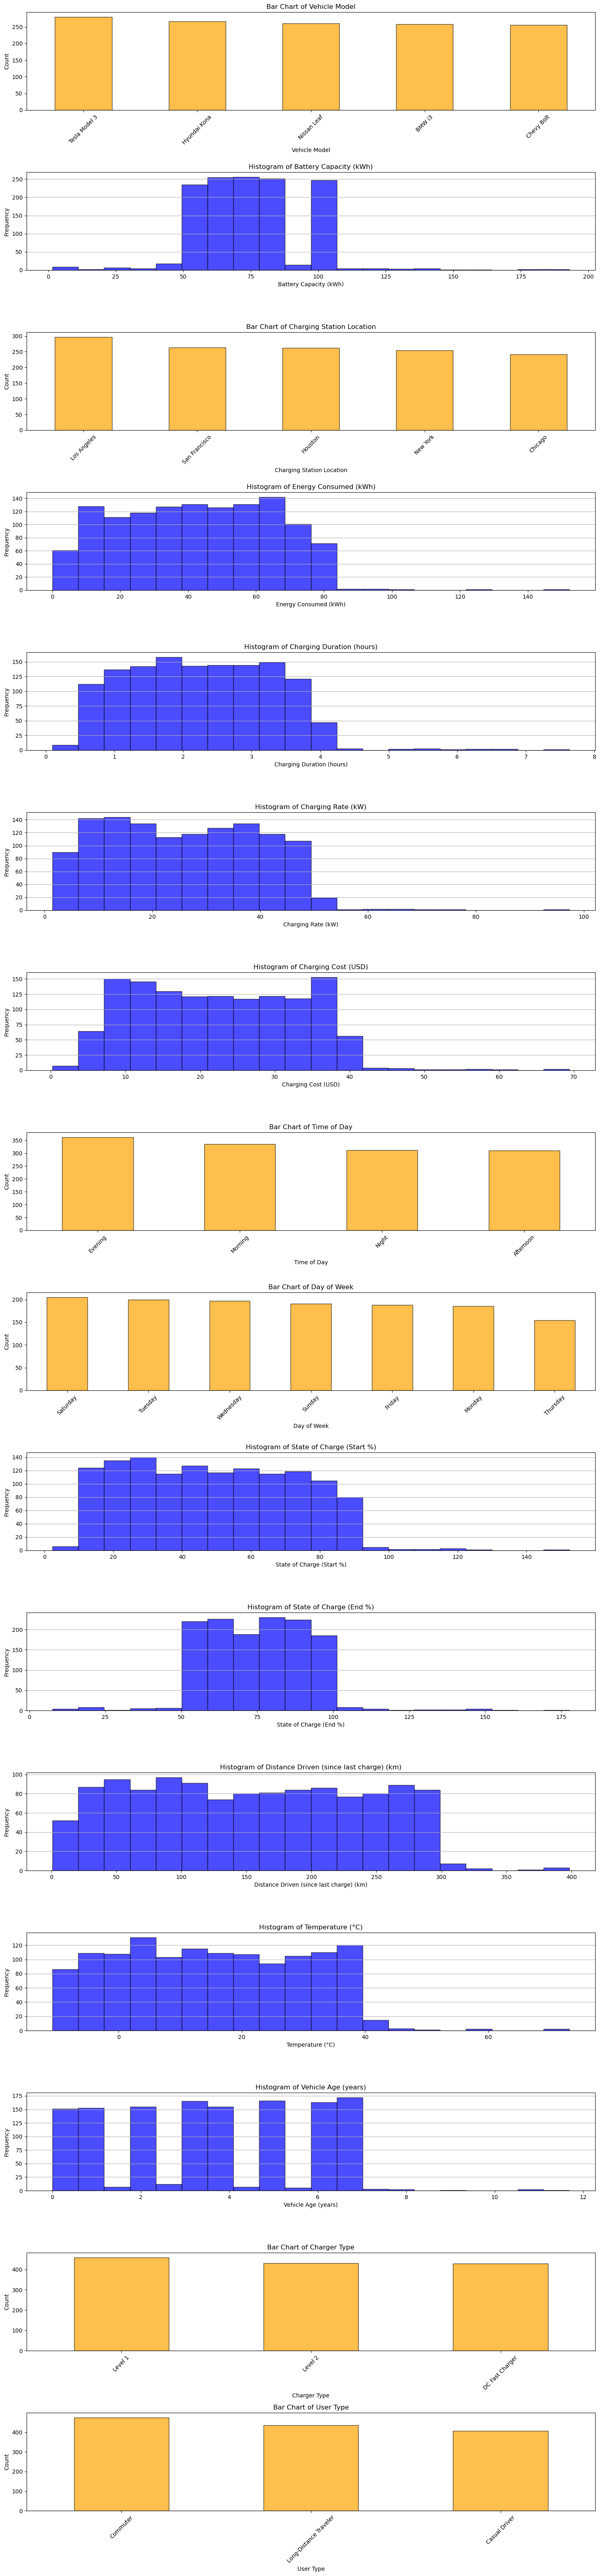

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# List of columns to create histograms for
columns_to_plot = [
    'Vehicle Model', 'Battery Capacity (kWh)',
    'Charging Station Location', 
    'Energy Consumed (kWh)', 'Charging Duration (hours)',
    'Charging Rate (kW)', 'Charging Cost (USD)', 'Time of Day',
    'Day of Week', 'State of Charge (Start %)', 'State of Charge (End %)',
    'Distance Driven (since last charge) (km)', 'Temperature (°C)',
    'Vehicle Age (years)', 'Charger Type', 'User Type'
]

# Set up the figure for subplots
num_columns = len(columns_to_plot)
plt.figure(figsize=(15, 4 * num_columns))  # Adjust the figure size based on the number of columns

# Loop through each column and create a histogram or bar chart
for i, column in enumerate(columns_to_plot):
    plt.subplot(num_columns, 1, i + 1)  # Create a subplot for each column
    if df[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
        plt.hist(df[column].dropna(), bins=20, color='blue', edgecolor='black', alpha=0.7)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(axis='y')
    else:  # For categorical columns, create a bar chart
        df[column].value_counts().plot(kind='bar', color='orange', edgecolor='black', alpha=0.7)
        plt.title(f'Bar Chart of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

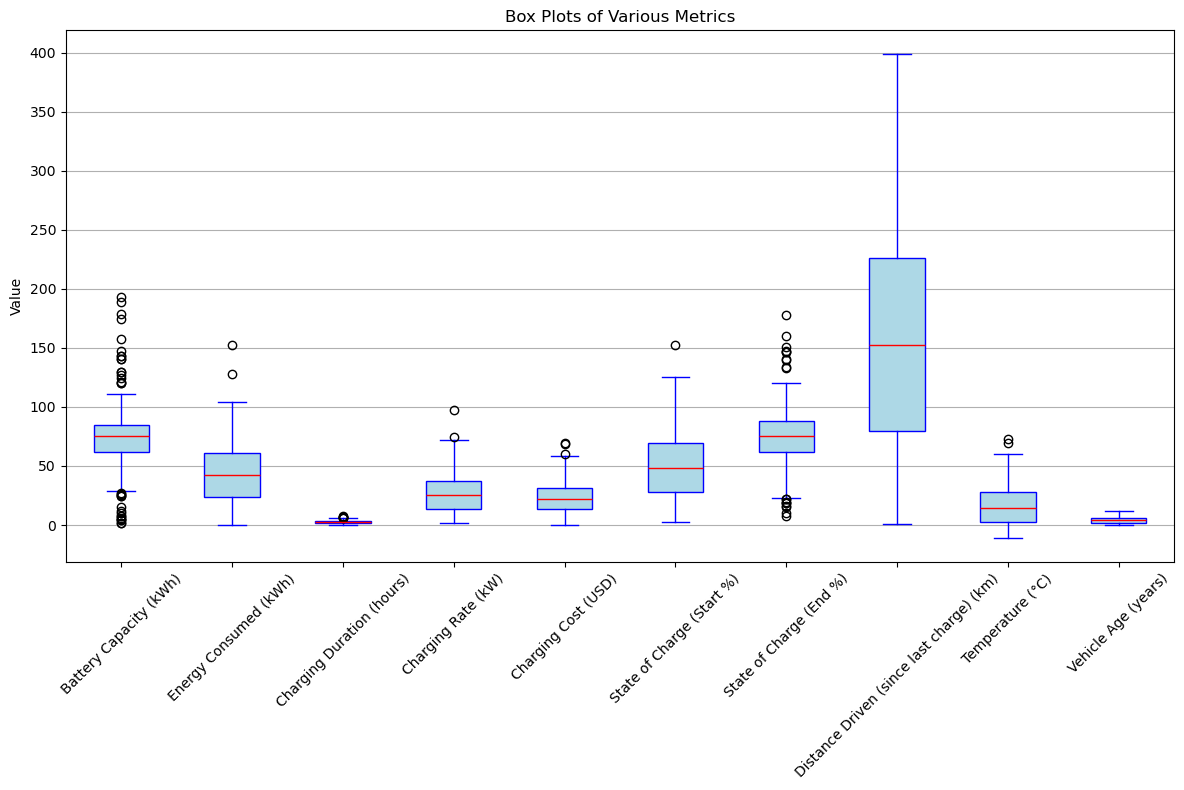

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# List of columns to create box plots for
columns_to_plot = [
    'Battery Capacity (kWh)',
    'Energy Consumed (kWh)', 
    'Charging Duration (hours)',
    'Charging Rate (kW)', 
    'Charging Cost (USD)', 
    'State of Charge (Start %)', 
    'State of Charge (End %)',
    'Distance Driven (since last charge) (km)', 
    'Temperature (°C)',
    'Vehicle Age (years)'
]

# Prepare the data for box plots
data_to_plot = [df[column].dropna() for column in columns_to_plot]

# Create a box plot for all specified columns in one graph
plt.figure(figsize=(12, 8))
plt.boxplot(data_to_plot, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'), 
            medianprops=dict(color='red'), 
            whiskerprops=dict(color='blue'), 
            capprops=dict(color='blue'))

# Set the x-ticks to the column names
plt.xticks(range(1, len(columns_to_plot) + 1), columns_to_plot, rotation=45)
plt.title('Box Plots of Various Metrics')
plt.ylabel('Value')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

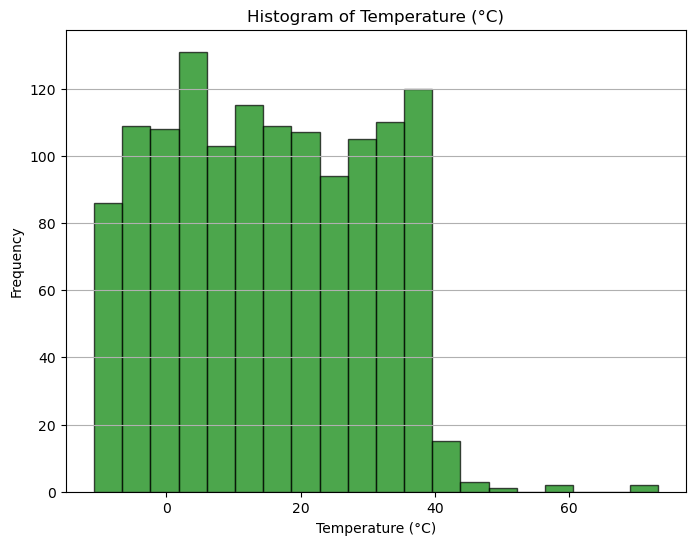

In [69]:
# Drop NaN values from the Temperature column
temperature_data = df['Temperature (°C)'].dropna()

# Create a histogram for the temperature data
plt.figure(figsize=(8, 6))
plt.hist(temperature_data, bins=20, color='green', edgecolor='black', alpha=0.7)  # Adjust the number of bins as needed
plt.title('Histogram of Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(axis='y')  # Add grid lines for better readability
plt.show()

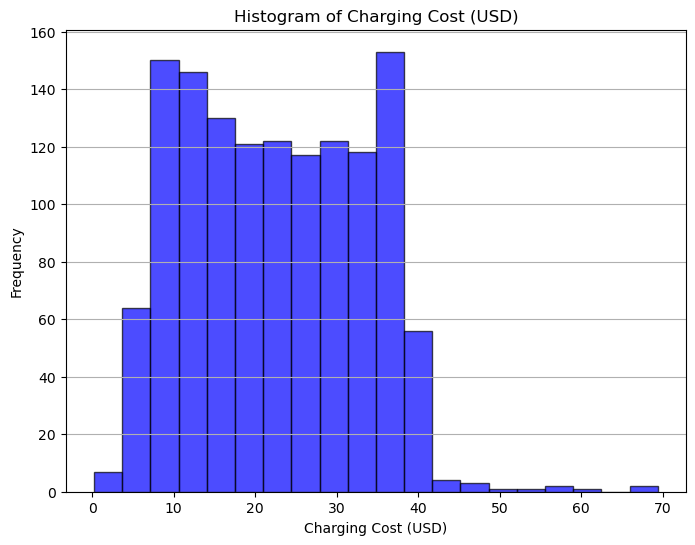

In [70]:
# Drop NaN values from the Charging Cost column
charging_cost_data = df['Charging Cost (USD)'].dropna()

# Create a histogram for the charging cost data
plt.figure(figsize=(8, 6))
plt.hist(charging_cost_data, bins=20, color='blue', edgecolor='black', alpha=0.7)  # Adjust the number of bins as needed
plt.title('Histogram of Charging Cost (USD)')
plt.xlabel('Charging Cost (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y')  # Add grid lines for better readability
plt.show()

/var/folders/zx/9hd8fp4948d0r4s6gk496ky00000gn/T/ipykernel_94295/1703339967.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Temperature (°C)', y='Charging Cost (USD)', palette='plasma')


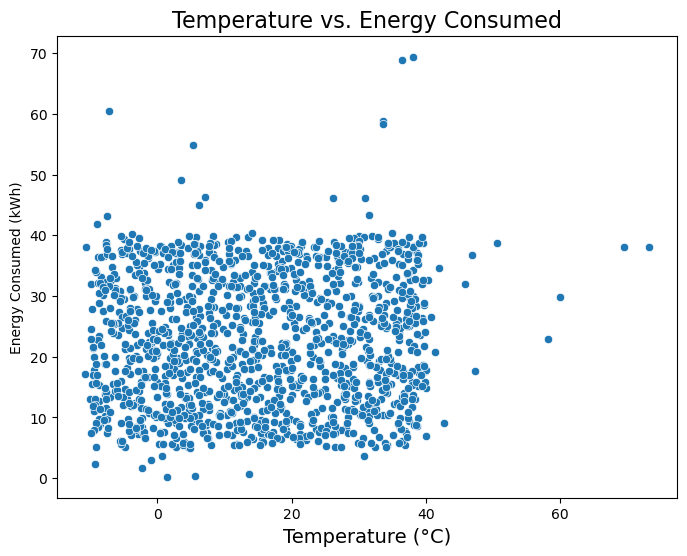

In [72]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Temperature (°C)', y='Charging Cost (USD)', palette='plasma')
plt.title('Temperature vs. Energy Consumed', fontsize = 16)
plt.xlabel('Temperature (°C)',fontsize = 14)
plt.ylabel('Energy Consumed (kWh)')
plt.show()

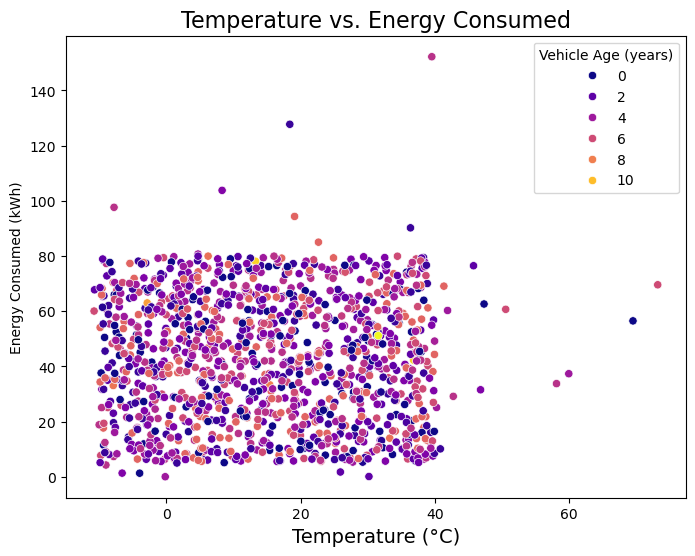

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Temperature (°C)', y='Energy Consumed (kWh)', hue='Vehicle Age (years)', palette='plasma')
plt.title('Temperature vs. Energy Consumed', fontsize = 16)
plt.xlabel('Temperature (°C)',fontsize = 14)
plt.ylabel('Energy Consumed (kWh)')
plt.show()

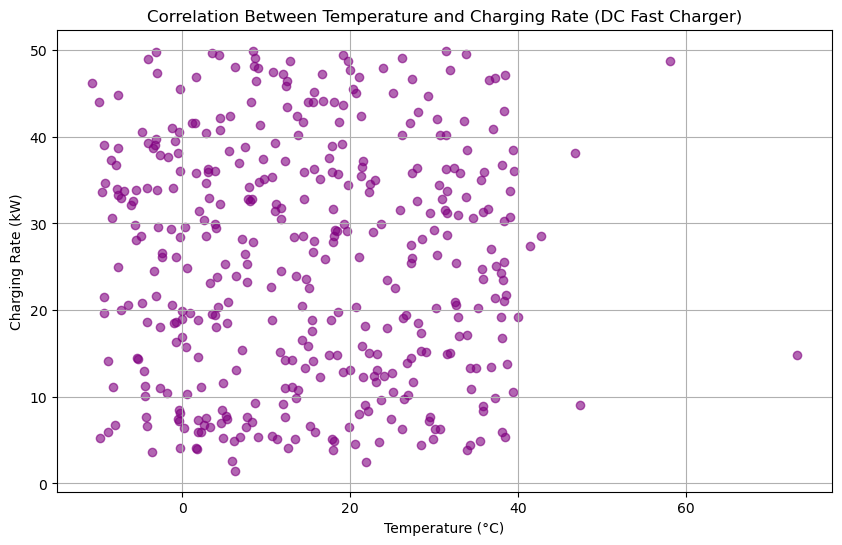

In [67]:
import matplotlib.pyplot as plt

# Filter the DataFrame for rows where Charger Type is 'DC Fast Charger'
dc_fast_charger_df = df[df['Charger Type'] == 'DC Fast Charger']

# Create a scatter plot for Charging Rate vs. Temperature
plt.figure(figsize=(10, 6))
plt.scatter(dc_fast_charger_df['Temperature (°C)'], dc_fast_charger_df['Charging Rate (kW)'], alpha=0.6, color='purple')
plt.title('Correlation Between Temperature and Charging Rate (DC Fast Charger)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Charging Rate (kW)')
plt.grid()
plt.show()

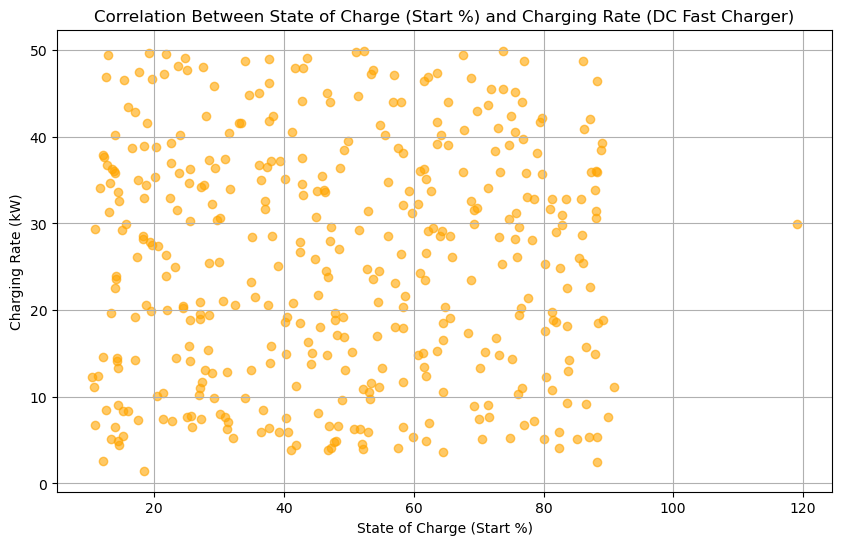

In [68]:
import matplotlib.pyplot as plt

# Filter the DataFrame for rows where Charger Type is 'DC Fast Charger'
dc_fast_charger_df = df[df['Charger Type'] == 'DC Fast Charger']

# Create a scatter plot for Charging Rate vs. State of Charge (Start %)
plt.figure(figsize=(10, 6))
plt.scatter(dc_fast_charger_df['State of Charge (Start %)'], dc_fast_charger_df['Charging Rate (kW)'], alpha=0.6, color='orange')
plt.title('Correlation Between State of Charge (Start %) and Charging Rate (DC Fast Charger)')
plt.xlabel('State of Charge (Start %)')
plt.ylabel('Charging Rate (kW)')
plt.grid()
plt.show()

In [52]:
correlation = df['Temperature (°C)'].corr(df['Charging Rate (kW)'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: 0.012818119660386866


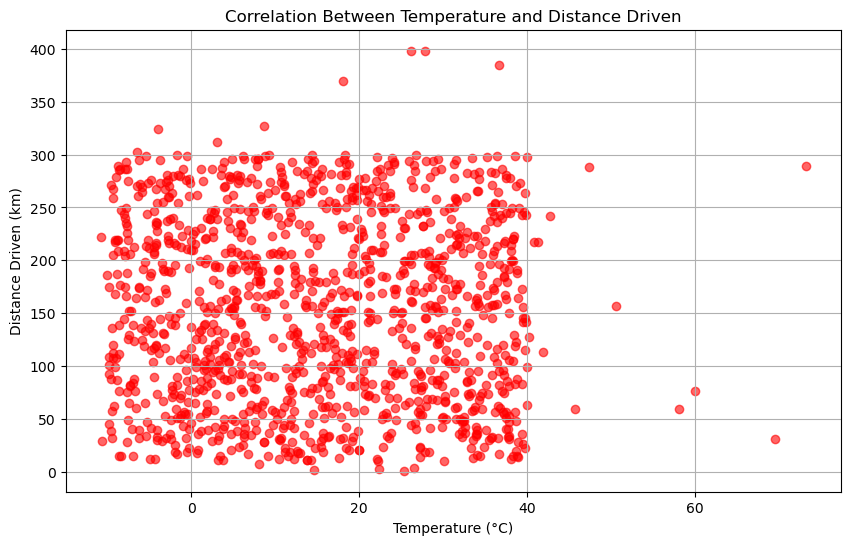

In [56]:
import matplotlib.pyplot as plt

# Assuming 'Distance Driven (km)' is the column name for distance driven
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature (°C)'], df['Distance Driven (since last charge) (km)'], alpha=0.6, color='red')
plt.title('Correlation Between Temperature and Distance Driven')
plt.xlabel('Temperature (°C)')
plt.ylabel('Distance Driven (km)')
plt.grid()
plt.show()

In [57]:
correlation = df['Temperature (°C)'].corr(df['Distance Driven (since last charge) (km)'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: -0.023733009917398257


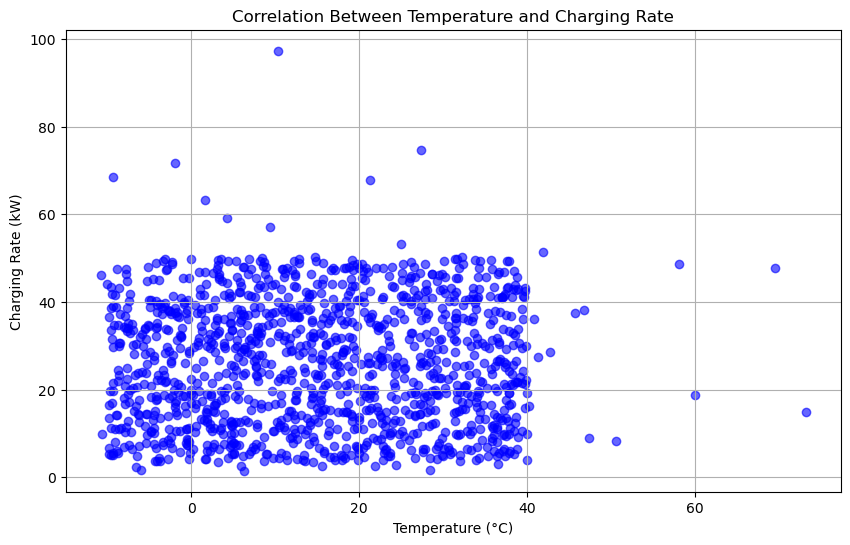

In [64]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature (°C)'], df['Charging Rate (kW)'], alpha=0.6, color='blue')
plt.title('Correlation Between Temperature and Charging Rate')
plt.xlabel('Temperature (°C)')
plt.ylabel('Charging Rate (kW)')
plt.grid()
plt.show()

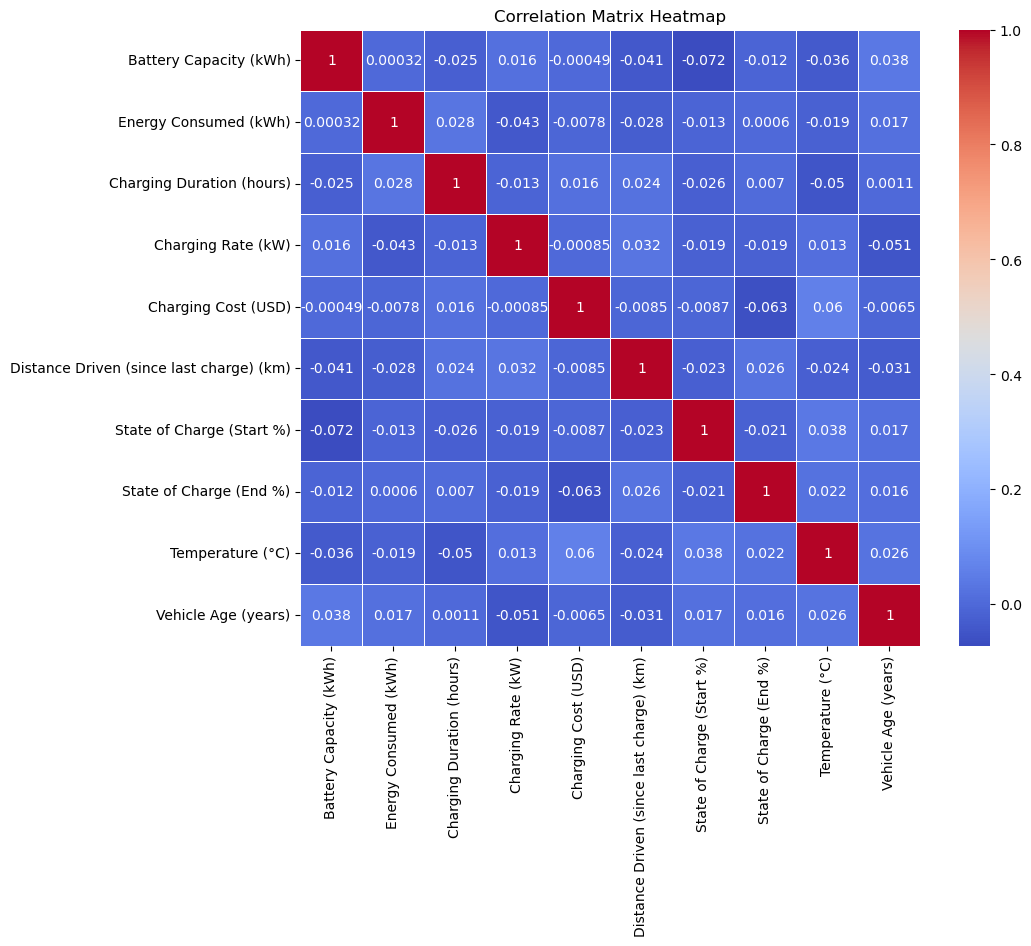

In [62]:
corr_columns = [
    'Battery Capacity (kWh)', 'Energy Consumed (kWh)', 'Charging Duration (hours)', 
    'Charging Rate (kW)', 'Charging Cost (USD)', 'Distance Driven (since last charge) (km)', 
    'State of Charge (Start %)', 'State of Charge (End %)', 'Temperature (°C)', 'Vehicle Age (years)'
]

corr_matrix = df[corr_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()